<최대한 빠르게 1차 모델링>

# 1. Data set Load

In [22]:
import pandas as pd
import numpy as np

# 함수 파일 import
import import_ipynb
from function_file import *
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [23]:
train=pd.read_csv(r"C:\Users\USER\Desktop\프로그래밍 공부\캐글 모델링\boston house\data\train.csv", index_col='Id')
test=pd.read_csv(r"C:\Users\USER\Desktop\프로그래밍 공부\캐글 모델링\boston house\data\test.csv", index_col='Id')

# 2. Data Profiling

In [24]:
# 프로파일 및 eda 목적용 데이터 프레임
data=pd.concat([train,test], sort=False)

데이터프로파일링 전 결측치가 너무 많은 특성 제거

In [25]:
# 결측값있는 특성
missing_col=list(data.columns[data.isnull().any()])
# 결측값 개수
print(len(data))
missing_sorted=data[missing_col].isnull().sum().sort_values(ascending=False)
print(missing_col)
print(missing_sorted)

2919
['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SalePrice']
PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
Kitch

결측값이 너무 많은 'Alley', 'FireplaceQu','Fence', 'MiscFeature'의 경우 결측값이 '없음'을 의미함
-> 임시로 nan이라는 값으로 맵핑 (이후 원핫인코딩)

In [26]:
non_col=['Alley', 'FireplaceQu','Fence', 'MiscFeature','PoolQC']
for i in non_col:
    data[i]=data[i].fillna('nan')

In [27]:
# # 결측값이 너무 많은 'Alley', 'FireplaceQu','Fence', 'MiscFeature'
# data=data.drop(['Alley', 'FireplaceQu','Fence', 'MiscFeature','PoolQC'], axis=1)
# remove_col=['Alley', 'FireplaceQu','Fence', 'MiscFeature','PoolQC']

for i in non_col:
     missing_col.remove(i)

In [28]:
# import pandas_profiling
# pr=data[missing_col].profile_report()
# pr.to_file(f'./pr_report.html')

1차 결측치 대치

In [29]:
mode_list = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
             'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageType',
             'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'SaleType']

mean_list = ['LotFrontage', 'TotalBsmtSF', 'GarageArea']

for i in mode_list:
        data[i] = data[i].fillna(data[i].mode().iloc[0])
for j in mean_list:
     data[j] = data[j].fillna(data[j].mean())


In [30]:
# 결측값있는 특성
missing_col=list(data.columns[data.isnull().any()])
# 결측값 개수
print(len(data))
missing_sorted=data[missing_col].isnull().sum().sort_values(ascending=False)
print(missing_col)
print(missing_sorted)

2919
['SalePrice']
SalePrice    1459
dtype: int64


# (3) 1차 모델링

1. 원핫인코딩

In [31]:
feature_multi_values={}
for col in data.columns:
    unique_values=data[col].unique()
    feature_multi_values[col]=len(unique_values)

multi_values=dict(sorted(feature_multi_values.items(), key=lambda x:x[1]))

# print(sorted(set(multi_values.values())))

multi_values_list=[]
for key, value in multi_values.items():
    if value>25:
        print(key, ": ",value)
        multi_values_list.append(key) #연속형 컬럼이름 추가

3SsnPorch :  31
LowQualFinSF :  36
MiscVal :  38
YearRemodAdd :  61
GarageYrBlt :  103
YearBuilt :  118
ScreenPorch :  121
LotFrontage :  129
EnclosedPorch :  183
OpenPorchSF :  252
BsmtFinSF2 :  272
WoodDeckSF :  379
MasVnrArea :  444
GarageArea :  604
2ndFlrSF :  635
SalePrice :  664
BsmtFinSF1 :  991
TotalBsmtSF :  1059
1stFlrSF :  1083
BsmtUnfSF :  1135
GrLivArea :  1292
LotArea :  1951


고유값이 많은 특성중 연도와 관련된 특성은 명목형으로 판단
'YearRemodAdd', 'GarageYrBlt', 'YearBuilt'

In [32]:
categori_col=list(data.columns)
for i in multi_values_list:
    categori_col.remove(i)
categori_col.append('YearRemodAdd')
categori_col.append('GarageYrBlt')
categori_col.append('YearBuilt')

In [33]:
# 원핫인코딩 대상: categori_col
print(categori_col)
continuous_col=multi_values_list
continuous_col.remove('YearRemodAdd')
continuous_col.remove('GarageYrBlt')
continuous_col.remove('YearBuilt')
print(continuous_col)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'YearRemodAdd', 'GarageYrBlt', 'YearBuilt']
['3SsnPorch', 'LowQualFinSF', 'MiscVal', 'ScreenPorch', 'LotFrontage', 'EnclosedPorch', 'OpenPorchSF', 'BsmtFinSF2', 'WoodDeckSF', 'MasVnrArea', 'GarageArea', '2ndFlrSF

In [34]:
#원핫인코딩하기 전에 데이터 형변환
for i in categori_col:
    data[i]=data[i].astype(str)

In [35]:
one_hot_encoded=pd.get_dummies(data[categori_col])

2. Min-Max Scaling

In [36]:
print(continuous_col)

['3SsnPorch', 'LowQualFinSF', 'MiscVal', 'ScreenPorch', 'LotFrontage', 'EnclosedPorch', 'OpenPorchSF', 'BsmtFinSF2', 'WoodDeckSF', 'MasVnrArea', 'GarageArea', '2ndFlrSF', 'SalePrice', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'BsmtUnfSF', 'GrLivArea', 'LotArea']


In [37]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max Scaler 객체 생성
scaler = MinMaxScaler()

# 선택할 컬럼 리스트 (타겟변수인 SalePrice는 제외)
columns_to_scale = ['3SsnPorch', 'LowQualFinSF', 'MiscVal', 'ScreenPorch', 'LotFrontage', 'EnclosedPorch', 'OpenPorchSF', 'BsmtFinSF2', 'WoodDeckSF', 'MasVnrArea', 'GarageArea', '2ndFlrSF', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'BsmtUnfSF', 'GrLivArea', 'LotArea']

# 선택한 컬럼들에 Min-Max Scaling 적용
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

In [38]:
#원핫인코딩 데이터셋, 연속형 값 데이터셋 결합(타겟변수인 SalePrice도 continous_col에 포함되어있음)
data=pd.concat([one_hot_encoded,data[continuous_col]], axis=1)

2. train, test set 다시 분할

In [39]:
train=data[:len(train)]
test=data[len(train):]

In [40]:
y_train=train['SalePrice']
X_train=train.drop('SalePrice', axis=1)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=42)

--------

## (4) 모델에 따른 성능 비교

### <트리 계열>

1. xgboost

CV Fold 1 - Score: 15529.8087, MSE: 858463910.0580, RMSE: 29299.5548
CV Fold 2 - Score: 19661.0983, MSE: 1070800124.3341, RMSE: 32723.0824
CV Fold 3 - Score: 18182.2616, MSE: 1009790251.8299, RMSE: 31777.1970
CV Fold 4 - Score: 16965.3757, MSE: 647511167.5768, RMSE: 25446.2407
CV Fold 5 - Score: 14647.4928, MSE: 417689976.1793, RMSE: 20437.4650
RMSE 평균: 27936.70800121381
RMSE 표준편차: 4515.687328696715
['GarageCars_3.0', 'ExterQual_TA', 'KitchenQual_Ex', 'BsmtQual_Ex', 'KitchenQual_Gd', 'GrLivArea', 'KitchenQual_TA', 'GarageCars_2.0', 'YearRemodAdd_1996', 'BsmtQual_TA', 'BsmtFinType1_GLQ', 'OverallQual_8', 'CentralAir_N', 'Fireplaces_0', 'GarageFinish_Unf', 'BsmtQual_Gd', 'KitchenAbvGr_1', 'Neighborhood_Crawfor', 'FullBath_3', 'LandContour_Bnk', 'TotalBsmtSF', 'HalfBath_0', 'YearBuilt_2008', 'BsmtFinSF1', 'BldgType_1Fam', 'MSSubClass_60', 'TotRmsAbvGrd_10', 'BedroomAbvGr_4', '1stFlrSF', 'BsmtExposure_No']


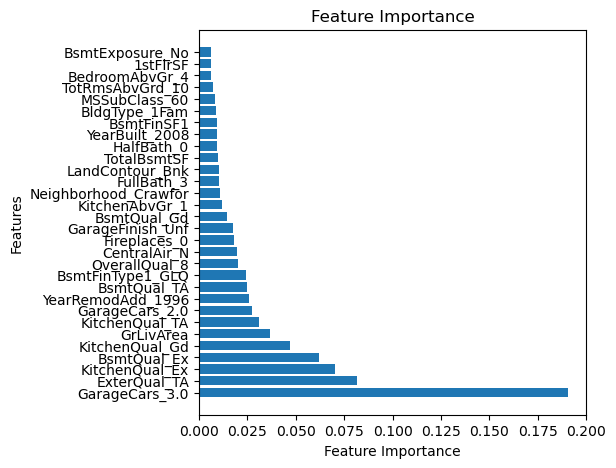

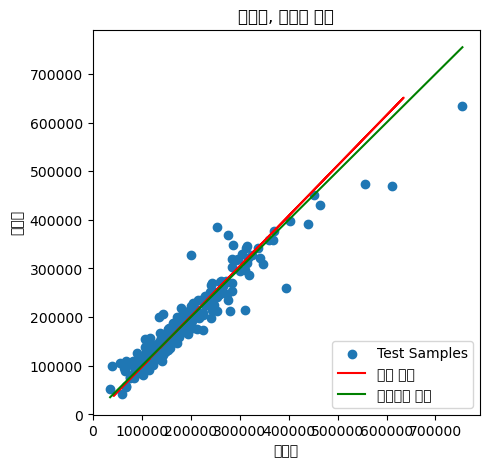

In [42]:
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

# XGBoost 모델
model_XGBoost = xgb.XGBRegressor(max_depth=3, n_estimators=600, learning_rate=0.1)
model_XGBoost.fit(X_train, y_train)
model_val(model_XGBoost, X_train, y_train)
feature_importance(model_XGBoost, X_train, 30)
visualize_model_predictions(model_XGBoost, X_test, y_test)

2. Gradient Boosting

CV Fold 1 - Score: 16312.1353, MSE: 949901848.9435, RMSE: 30820.4778
CV Fold 2 - Score: 19507.3957, MSE: 1268010669.9605, RMSE: 35609.1375
CV Fold 3 - Score: 17576.3056, MSE: 989502340.6103, RMSE: 31456.3561
CV Fold 4 - Score: 17384.3928, MSE: 637048744.6141, RMSE: 25239.8246
CV Fold 5 - Score: 16267.6712, MSE: 590304738.9375, RMSE: 24296.1877
RMSE 평균: 29484.396729712753
RMSE 표준편차: 4198.096961492351


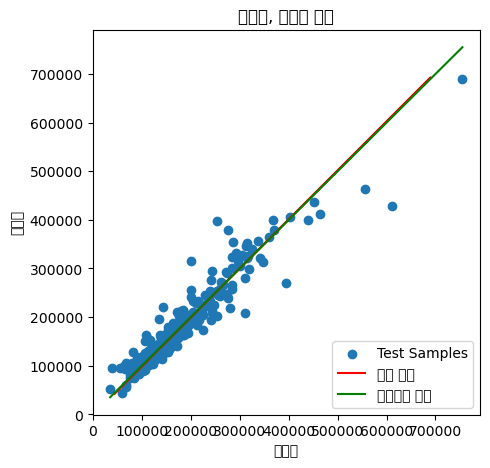

In [43]:
# Gradient Boosting 모델
model_Gradient = GradientBoostingRegressor(max_depth=3, n_estimators=600, learning_rate=0.1)
model_Gradient.fit(X_train, y_train)
#교차검증 함수
model_val(model_Gradient, X_train, y_train)
#중요도 시각화
# feature_importance(model_Gradient, X_train, 30)
visualize_model_predictions(model_Gradient, X_test, y_test)

3. RandomForest

CV Fold 1 - Score: 24583.4479, MSE: 1630001041.9501, RMSE: 40373.2714
CV Fold 2 - Score: 29739.7116, MSE: 2010021874.4506, RMSE: 44833.2675
CV Fold 3 - Score: 28828.3323, MSE: 2108644729.1500, RMSE: 45919.9818
CV Fold 4 - Score: 27311.2157, MSE: 1569233588.3768, RMSE: 39613.5531
CV Fold 5 - Score: 24019.3966, MSE: 1197778345.8910, RMSE: 34608.9345
RMSE 평균: 41069.801650890164
RMSE 표준편차: 4050.5935762855233
['GarageCars_3.0', 'GrLivArea', 'ExterQual_TA', 'TotalBsmtSF', 'BsmtQual_Ex', '1stFlrSF', 'GarageArea', 'BsmtFinSF1', '2ndFlrSF', 'KitchenQual_Ex', 'GarageFinish_Unf', 'OverallQual_8', 'YearRemodAdd_1996', 'KitchenQual_TA', 'BsmtQual_TA', 'LotArea', 'ExterQual_Gd', 'MasVnrArea', 'FullBath_1', 'BsmtQual_Gd', 'GarageCars_2.0', 'ExterQual_Ex', 'BsmtFinType1_GLQ', 'TotRmsAbvGrd_10', 'KitchenQual_Gd', 'LotFrontage', 'ScreenPorch', 'HeatingQC_Ex', 'PoolArea_555', 'Fireplaces_2']


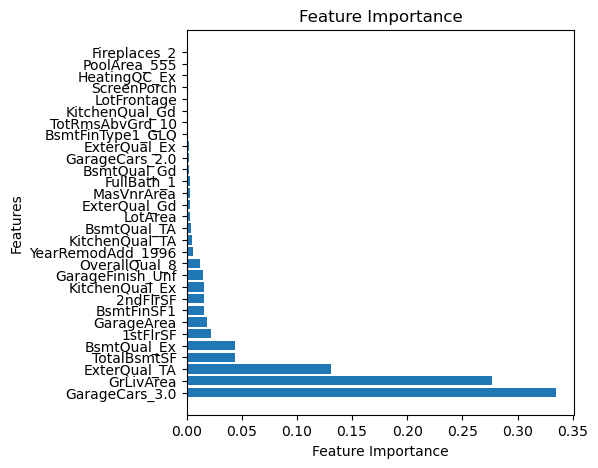

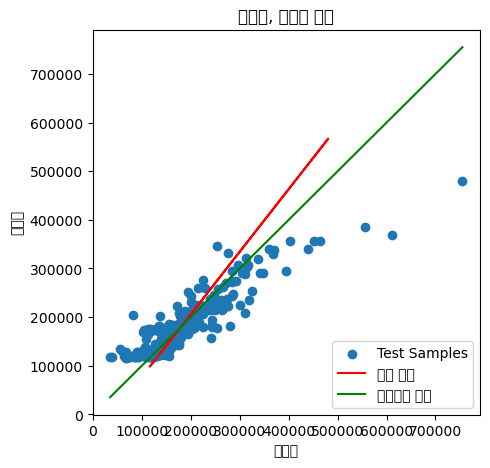

In [44]:
# Random Forest 모델
model_RandomForest = RandomForestRegressor(n_estimators=600, max_depth=3, random_state=0)
model_RandomForest.fit(X_train, y_train)
model_val(model_RandomForest, X_train, y_train)
feature_importance(model_RandomForest, X_train, 30)
visualize_model_predictions(model_RandomForest, X_test, y_test)

### <회귀 유형>

1. LinearRegression

CV Fold 1 - Score: 42511149512215.2734, MSE: 108296578623335091110594740224.0000, RMSE: 329084455152982.1250
CV Fold 2 - Score: 264634858846593.1562, MSE: 1901388795950713116199252656128.0000, RMSE: 1378908552424965.2500
CV Fold 3 - Score: 37129606919775.7031, MSE: 24442850977483307254974251008.0000, RMSE: 156342095986600.1875
CV Fold 4 - Score: 309785706894674.0000, MSE: 8634221161867396040594515034112.0000, RMSE: 2938404526587072.0000
CV Fold 5 - Score: 153247815740489.5000, MSE: 783751216591449428572539715584.0000, RMSE: 885297247590575.8750
RMSE 평균: 1137607375548439.2
RMSE 표준편차: 998133047193543.1


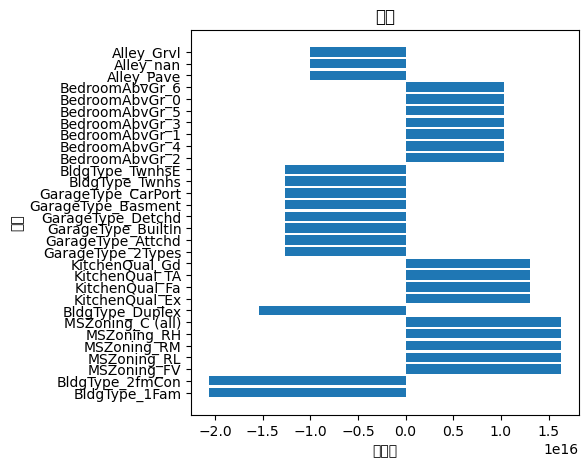

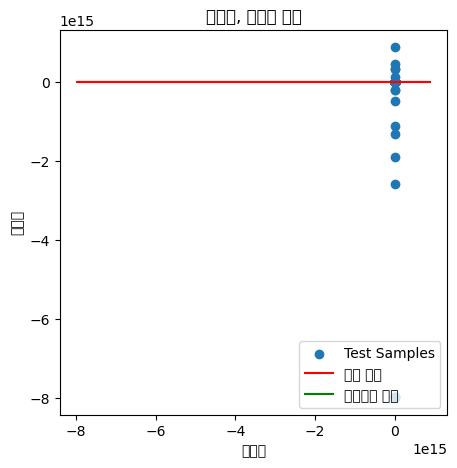

In [45]:
from sklearn.linear_model import LinearRegression
# 선형회귀 모델
model_LinearRegression = LinearRegression()
model_LinearRegression.fit(X_train, y_train)
model_val(model_LinearRegression, X_train, y_train)
Regression_coef(model_LinearRegression, X_train, top_n=30)
visualize_model_predictions(model_LinearRegression, X_test, y_test)

2. Ridge

CV Fold 1 - Score: 21472.2340, MSE: 1125683711.5601, RMSE: 33551.2103
CV Fold 2 - Score: 20134.2571, MSE: 1206195964.3117, RMSE: 34730.3321
CV Fold 3 - Score: 21161.1945, MSE: 2005088417.5339, RMSE: 44778.2136
CV Fold 4 - Score: 21810.2428, MSE: 1003114431.5692, RMSE: 31671.9818
CV Fold 5 - Score: 19047.9826, MSE: 743151089.9504, RMSE: 27260.7977
RMSE 평균: 34398.50709322757
RMSE 표준편차: 5778.359000809303


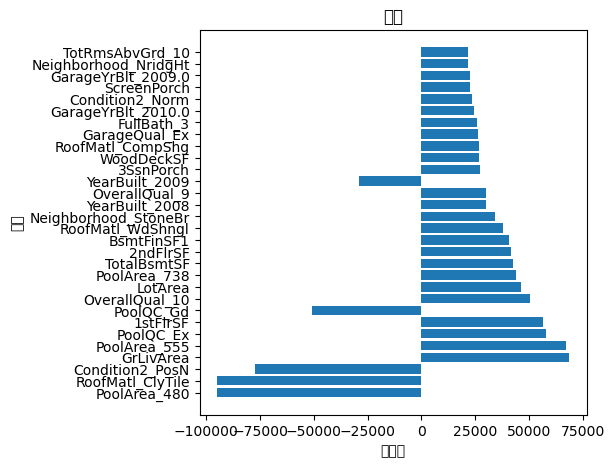

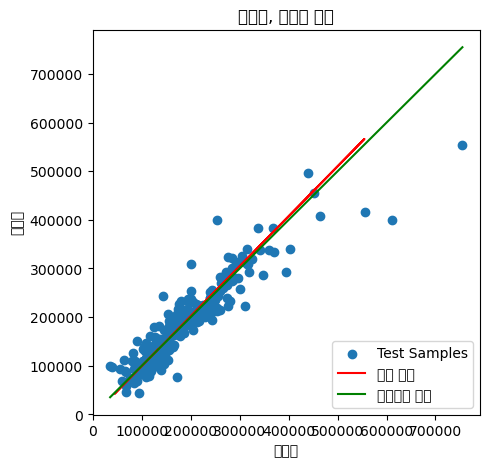

In [46]:
# 릿지 회귀 모델
from sklearn.linear_model import Ridge
model_Ridge = Ridge(alpha=1.0)
model_Ridge.fit(X_train, y_train)
model_val(model_Ridge, X_train, y_train,)
Regression_coef(model_Ridge, X_train, top_n=30)
visualize_model_predictions(model_Ridge, X_test, y_test)

3. Lasso

CV Fold 1 - Score: 23054.6976, MSE: 1528653507.5297, RMSE: 39097.9988
CV Fold 2 - Score: 24359.8731, MSE: 1309805814.8836, RMSE: 36191.2395
CV Fold 3 - Score: 24001.6451, MSE: 1744081813.6671, RMSE: 41762.2056
CV Fold 4 - Score: 24018.1107, MSE: 1161113418.6374, RMSE: 34075.1144
CV Fold 5 - Score: 19794.6724, MSE: 779108651.2833, RMSE: 27912.5178
RMSE 평균: 35807.81519849968
RMSE 표준편차: 4727.897197518507


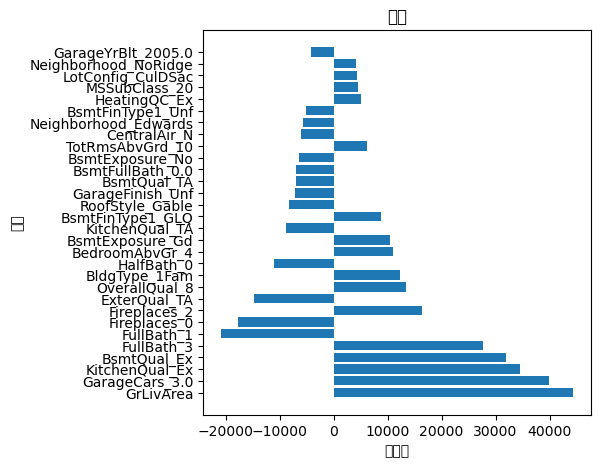

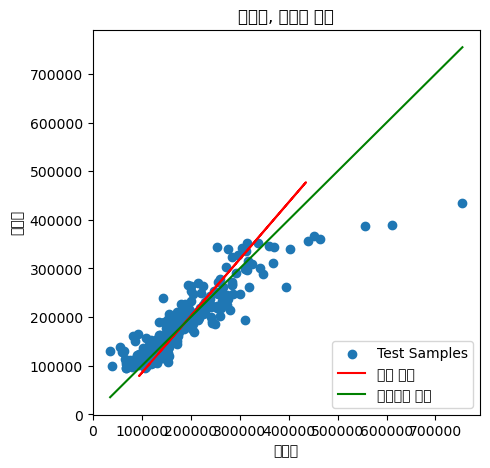

In [47]:
# 라쏘 회귀 모델
from sklearn.linear_model import Lasso
model_Lasso = Lasso(alpha=1000)
model_Lasso.fit(X_train, y_train)
model_val(model_Lasso, X_train, y_train,)
Regression_coef(model_Lasso, X_train, top_n=30)
visualize_model_predictions(model_Lasso, X_test, y_test)

4. ElasticNet

CV Fold 1 - Score: 25593.5457, MSE: 2214370700.7477, RMSE: 47057.1004
CV Fold 2 - Score: 25733.2618, MSE: 1281828220.2887, RMSE: 35802.6287
CV Fold 3 - Score: 29106.3149, MSE: 2466225585.8983, RMSE: 49661.1074
CV Fold 4 - Score: 26358.8037, MSE: 1565039268.8762, RMSE: 39560.5772
CV Fold 5 - Score: 23853.0128, MSE: 1239104730.4202, RMSE: 35200.9195
RMSE 평균: 41456.46662884042
RMSE 표준편차: 5888.554652717816


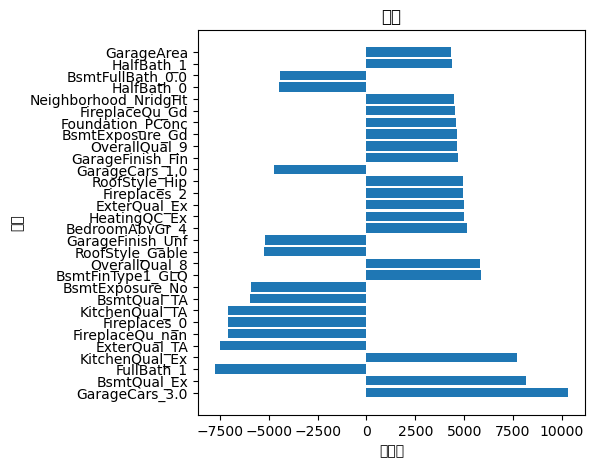

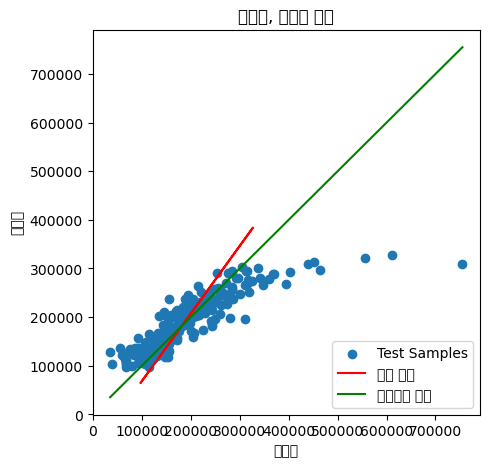

In [48]:
# 엘라스틱 넷 회귀 모델
from sklearn.linear_model import ElasticNet
model_ElasticNet = ElasticNet(alpha=1.0, l1_ratio=0.5)
model_ElasticNet.fit(X_train, y_train)
model_val(model_ElasticNet, X_train, y_train,)
Regression_coef(model_ElasticNet, X_train, top_n=30)
visualize_model_predictions(model_ElasticNet, X_test, y_test)

In [49]:
X_test=test.drop('SalePrice',axis=1)
test_y_pred = model_XGBoost.predict(X_test)
submission = pd.DataFrame()
submission['Id'] = test.index
submission['SalePrice'] = test_y_pred
# submission.to_csv('submission.csv', index=False)